In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')

# Data 

Source: [Graduate Admissions (Kaggle)](https://www.kaggle.com/mohansacharya/graduate-admissions) \
Parameters:
1. GRE Scores
2. TOEFL Scores
3. University Rating
4. Statement of Purpose Strength
5. Letter of Recommendation Strength
6. Undergraduate GPA
7. Research Experience
8. Chance of Admit

In [26]:
df = pd.read_csv('Admission_Predict.csv')
df = df.drop(['Serial No.'], axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


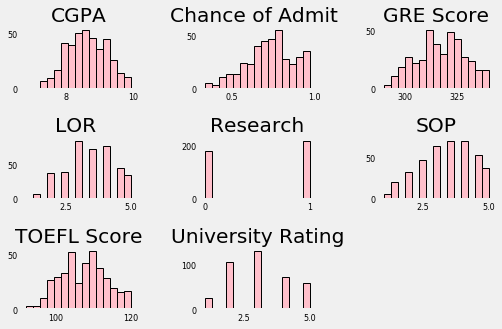

In [20]:
# Visualize variable distribution
df.hist(bins=15, color='pink', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

**Issue**
The scales and range of parameters are very different from each other. This can lead to large regression coefficients for variables with small scales. \
To deal with this, we can normalize the data.

In [29]:
# min-max normalization
df = (df-df.min())/(df.max()-df.min())
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


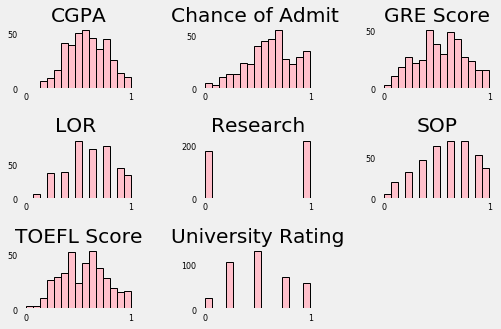

In [30]:
# Visualize normalized variables
df.hist(bins=15, color='pink', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

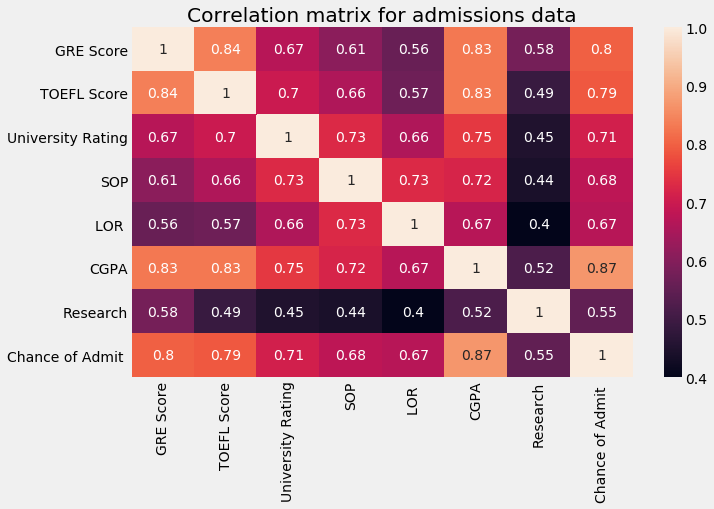

In [31]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
sns.heatmap(round(corr,2), annot=True)
plt.title('Correlation matrix for admissions data')
plt.show()

**Issue:** Existence of multicollinearity. For the sake of this example, we ignore it.

# Linear Regression (Univariate)
Chance of admit has the max correlation with CGPA. Using CGPA as the independent variable for univariate regression.

Text(0, 0.5, 'Chance of Admit')

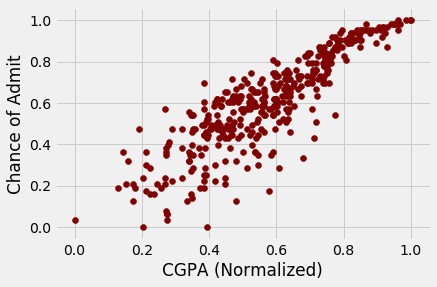

In [34]:
plt.scatter(df['CGPA'], df['Chance of Admit '], color = 'maroon')
plt.xlabel('CGPA (Normalized)')
plt.ylabel('Chance of Admit')

In [35]:
cgpa = df['CGPA']
chance_admit = df['Chance of Admit ']
X = sm.add_constant(cgpa)
model = sm.OLS(chance_admit, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1279.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          2.34e-126
Time:                        20:39:14   Log-Likelihood:                 314.80
No. Observations:                 400   AIC:                            -625.6
Df Residuals:                     398   BIC:                            -617.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0137      0.018      0.782      0.435      -0.021       0.048
CGPA           1.0343      0.029     35.759      0.000       0.977       1.091
==============================================================================
Omnibus:                       62.400   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.112
Skew:                          -0.926   Prob(JB):                     1.50e-23
Kurtosis:                       4.697   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear Regression Summary: \
Intercept: 0.0137, Slope: 1.0343

The correlation is significant.

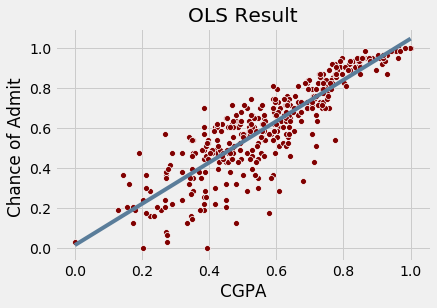

In [36]:
sns.scatterplot(cgpa, chance_admit, color = 'maroon')
sns.lineplot(cgpa, model.predict(X), color = '#5a7d9a')
plt.title('OLS Result')
plt.show()

# Multivariate Regression

In [39]:
endo = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
exo = df['Chance of Admit ']

In [40]:
mulReg = sm.OLS(exo, endo).fit()
mulReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              2308.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                   1.03e-314
Time:                        20:44:37   Log-Likelihood:                          352.39
No. Observations:                 400   AIC:                                     -690.8
Df Residuals:                     393   BIC:                                     -662.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.1366      0.047      2.884      0.004       0.043       0.230
TOEFL Score           0.1325      0.048      2.751      0.006       0.038       0.227
University Rating     0.0313      0.029      1.079      0.281      -0.026       0.088
SOP                  -0.0200      0.035     -0.568      0.570      -0.089       0.049
LOR                   0.1482      0.033      4.428      0.000       0.082       0.214
CGPA                  0.6021      0.056     10.727      0.000       0.492       0.712
Research              0.0379      0.012      3.031      0.003       0.013       0.062
==============================================================================
Omnibus:                       84.501   Durbin-Watson:                   0.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.318
Skew:                          -1.121   Prob(JB):                     3.82e-38
Kurtosis:                       5.305   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The adjusted R-squared value is not significantly lower than R-squared. Can conclude that including additional variables in the model is not detrimental (of course, ignoring the multicollinearity discussed earlier).
2. From the t values, it seems that CGPA has the largest contribution in predicting the chance of acceptance. 
3. p-value for University Rating and SOP $> 0.05$. Not statistically significant.
4. High condition number, falls in line with the multicollinearity seen earlier.